In [1]:
import os, sys
import numpy as np
from math import fsum
import matplotlib.pyplot as plt

PROJECT_DIR = os.path.abspath('../code')
sys.path.append(PROJECT_DIR)

In [2]:
# Import main classes.
from src.genome.gene import Gene
from src.genome.chromosome import Chromosome
from src.engines.standard_ga import StandardGA

# Import Selection Operators.
from src.operators.selection.tournament_selector import TournamentSelector
from src.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operators.
from src.operators.crossover.uniform_crossover import UniformCrossover
from src.operators.crossover.single_point_crossover import SinglePointCrossover

# Import Mutation Operators.
from src.operators.mutation.swap_mutator import SwapMutator
from src.operators.mutation.random_mutator import RandomMutator

## Sphere optimization

In [3]:
# Shpere function.
def fun_Sphere(_chromosome):
    
    # Return the negative (to account for minimization).
    return -fsum([xi.datum**2 for xi in _chromosome])
# _end_def_

# Random function ~N(0,1).
_func = lambda: np.random.normal()

In [4]:
# Define the number of genes.
M = 10

# Define the number of chromosomes.
N = 100

# Initial population.
population = [Chromosome([Gene(np.random.uniform(-2.0, +2.0), _func) for j in range(M)], np.nan, True)
              for i in range(N)]

# Set the fitness function.
fun_optim = fun_Sphere

# Create the StandardGA.
toy_GA = StandardGA(initial_pop=population, fit_func=fun_optim,
                    select_op=LinearRankSelector(),
                    mutate_op=RandomMutator(0.1),
                    cross_op=UniformCrossover())

In [5]:
toy_GA.run(epochs=1000, elitism=True, f_tol=1.0e-6, verbose=False)

Initial Avg. Fitness = -13.1872
Final Avg. Fitness = -0.0127
Elapsed time: 19.436 seconds.


In [6]:
toy_GA.best_chromosome().fitness, toy_GA.best_chromosome()._genome

(-6.477606007109025e-05,
 [Gene(datum=0.001628618734880177, _func=<function <lambda> at 0x11e253640>, valid=True),
  Gene(datum=0.0012813863272279006, _func=<function <lambda> at 0x11e253640>, valid=True),
  Gene(datum=-0.00018292913890368713, _func=<function <lambda> at 0x11e253640>, valid=True),
  Gene(datum=0.006297527524583482, _func=<function <lambda> at 0x11e253640>, valid=True),
  Gene(datum=0.0004684773495371944, _func=<function <lambda> at 0x11e253640>, valid=True),
  Gene(datum=-0.0011663738495202964, _func=<function <lambda> at 0x11e253640>, valid=True),
  Gene(datum=0.0020664179148717093, _func=<function <lambda> at 0x11e253640>, valid=True),
  Gene(datum=-0.0007851542552002852, _func=<function <lambda> at 0x11e253640>, valid=True),
  Gene(datum=0.0007222572426977851, _func=<function <lambda> at 0x11e253640>, valid=True),
  Gene(datum=-0.003715008676069125, _func=<function <lambda> at 0x11e253640>, valid=True)])

In [7]:
toy_GA.print_operator_stats()

 UniformCrossover: (4800785328)
 _probability: 0.9
 _rng: Generator(PCG64)
 _counter: 50000

 LinearRankSelector: (4800785568)
 _probability: 1.0
 _rng: Generator(PCG64)
 _counter: 1000

 RandomMutator: (4800498400)
 _probability: 0.1
 _rng: Generator(PCG64)
 _counter: 10069



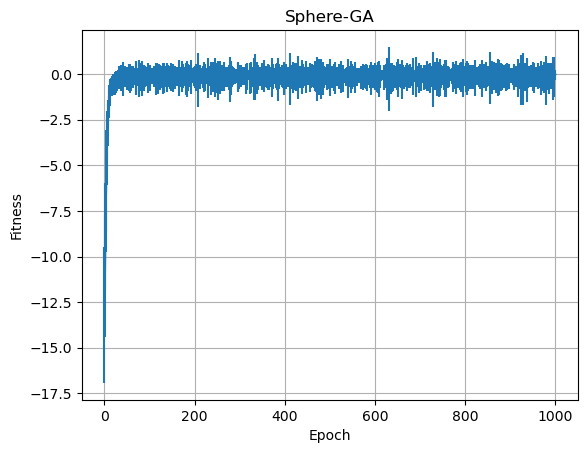

In [8]:
plt.errorbar(x=range(len(toy_GA.stats['avg'])),
             y=toy_GA.stats['avg'], yerr=toy_GA.stats['std'])

plt.grid(True)
plt.title("Sphere-GA")
plt.xlabel("Epoch")
plt.ylabel("Fitness");